In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shareddrives/CSCI 461/processed'
/content/drive/Shareddrives/CSCI 461/processed


In [ ]:
COLOR_BLUEISH = '#5A9'
cmap_blueish=sns.light_palette(COLOR_BLUEISH, as_cmap=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("combined_ohe_17.csv")
df.head()


,recnumbr,age,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_HI,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_MT,st_NC,st_ND,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_PR,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,sex_male,sex_female,outcmfcs_no,outcmfcs_yes,amiakn_no,amiakn_yes,asian_no,asian_yes,blkafram_no,blkafram_yes,hawaiipi_no,hawaiipi_yes,white_no,white_yes,raceunkn_no,raceunkn_yes,hisorgin_no,hisorgin_yes,emplysklls_no,emplysklls_yes,educaid_no,educaid_yes,pubfinas_no,pubfinas_not applicable,pubfinas_yes,pubfoodas_no,pubfoodas_yes,pubfoodas_not applicable,othrfinas_no,othrfinas_yes,currenroll_no,currenroll_yes,cnctadult_no,cnctadult_yes,children_no,children_yes,marriage_no,marriage_not applicable,marriage_yes,medicaid_do not know,medicaid_no,medicaid_yes,othrhlthin_do not know,othrhlthin_no,othrhlthin_not applicable,othrhlthin_yes,medicalin_no,medicalin_yes,medicalin_do not know,medicalin_not applicable,mentlhlthin_no,mentlhlthin_yes,mentlhlthin_do not know,mentlhlthin_not applicable,prescripin_no,prescripin_yes,prescripin_do not know,prescripin_not applicable,baseline_yes,specedsv_No,specedsv_Yes,ilnasv_No,ilnasv_Yes,acsuppsv_No,acsuppsv_Yes,psedsuppsv_No,psedsuppsv_Yes,careersv_No,careersv_Yes,emplytrsv_No,emplytrsv_Yes,budgetsv_No,budgetsv_Yes,housedsv_No,housedsv_Yes,hlthedsv_No,hlthedsv_Yes,famsuppsv_No,famsuppsv_Yes,mentorsv_No,mentorsv_Yes,silsv_No,silsv_Yes,rmbrdfasv_No,rmbrdfasv_Yes,educfinasv_No,educfinasv_Yes,othrfinasv_No,othrfinasv_Yes,highedcert_associate degree,highedcert_bachelor degree,highedcert_high school or ged,highedcert_higher degree,highedcert_none of the above,highedcert_vocational certificate,highedcert_vocational license,homeless_no,homeless_yes,subabuse_no,subabuse_yes,incarc_no,incarc_yes,currfte_no,currfte_yes,currpte_no,currpte_yes
0,000180733692,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,00BaEOYIaD3S,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
2,00BdZKHi537S,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
3,00Be9JBpc0C0,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1
4,00BErykc501S,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [ ]:
# reverse one-hot encoding
# df['season'] = (df.iloc[:, 2:] == 1).idxmax(1)

# # actuals and predicted to one column
# df = df.melt(id_vars ='season', value_vars=['actuals', 'predicted'])

# sns.boxplot(x='season', y='value', hue='variable', data=df, palette="Set3")

In [ ]:
df1 = pd.read_csv("processed_data_zoe.csv")
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,fy,stfips,st,repdate,dob,sex,amiakn,asian,blkafram,hawaiipi,white,raceunkn,racedcln,hisorgin,fcstatsv,lclfipssv,tribesv,delinqntsv,edlevlsv,specedsv,ilnasv,acsuppsv,psedsuppsv,careersv,emplytrsv,budgetsv,housedsv,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,stfcid,race,raceethn,agemp,cohort,num_surveyed,wave,stfips.1,st.1,repdate.1,dob.1,sex.1,amiakn.1,asian.1,blkafram.1,hawaiipi.1,white.1,raceunkn.1,racedcln.1,hisorgin.1,outcmrpt,outcmdte,outcmfcs,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,pubfoodas,pubhousas,othrfinas,highedcert,currenroll,cnctadult,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,edlevlsv_numerical,"No, received services, but was not in FC","Yes, received services & was in FC",78,blank,death,declined,incapacitated,incarcerated,not in sample,parent declined,participated,runaway or missing,unable to locate,Unnamed: 95,edu,edu_hs_binary,edlevlsv_binary
0,0,2011,1,AL,201109,1994-06-15,Male,No,No,Yes,No,No,No,No,No,"Yes, received services & was in FC",<1000 Records in AFCARS,No,No,9th grade,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,AL000000017071,Black Only,"NH, Black Only",17.0,0,2,Age 17 Baseline Survey,Alabama,AL,201109,1994-06-15,male,no,no,yes,no,no,no,no,no,participated,2011-09-15,no,no,no,no,no,no,no,no,no,no,none of the above,yes,yes,no,no,yes,no,NaN,yes,no,NaN,NaN,NaN,yes,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9th grade,4.0,0.0
1,1,2020,1,AL,202003,2003-01-15,Female,No,No,Yes,No,No,No,No,No,"Yes, received services & was in FC",<1000 Records in AFCARS,No,No,11th grade,No,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,AL000000033312,Black Only,"NH, Black Only",16.0,2020,3,Age 17 Baseline Survey,1,AL,202003,2003-01-15,female,no,no,yes,no,no,no,no,no,participated,2020-02-25,yes,no,no,no,no,no,NaN,NaN,NaN,no,none of the above,yes,yes,no,no,no,no,NaN,yes,no,NaN,NaN,NaN,yes,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11th grade,6.0,0.0
2,2,2020,1,AL,202003,2002-12-15,Male,No,No,Yes,No,No,No,No,No,"Yes, received services & was in FC",<1000 Records in AFCARS,No,No,11th grade,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,AL000000037999,Black Only,"NH, Black Only",17.0,2020,3,Age 17 Baseline Survey,1,AL,202003,2002-12-15,male,no,no,yes,no,no,no,no,no,participated,2019-12-26,yes,no,no,no,no,no,no,no,no,no,none of the above,yes,yes,no,no,no,no,NaN,yes,no,NaN,NaN,NaN,yes,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11th grade,6.0,0.0
3,3,2017,1,AL,201709,1997-05-15,Male,No,No,Yes,No,No,No,No,No,"Yes, received services & was in FC",<1000 Records in AFCARS,No,No,12th grade,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,AL000000038434,Black Only,"NH, Black Only",20.0,0,3,Age 17 Baseline Survey,1,AL,201409,1997-05-15,male,no,no,yes,no,no,no,no,no,incapacitated,NaN,yes,no,no,no,yes,no,no,no,no,no,none of the above,yes,yes,no,no,no,no,NaN,yes,no,yes,yes,yes,yes,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12th grade,7.0,1.0
4,4,2013,1,AL,201303,1996-10-15,Male,No,No,Yes,No,No,No,No,No,"Yes, received services & was in FC",<1000 Records in AFCARS,No,No,10th grade,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,AL000000046332,Black Only,"NH, Black Only",16.0,2014,3,Age 21 Followup,1,AL,201803,1996-10-15,male,no,no,yes,no,no,no,no,no,participated,2018-02-26,no,no,no,no,no,no,NaN,NaN,NaN,no,none of the above,no,yes,no,no,yes,yes,no,NaN,no,NaN,NaN,NaN,yes,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10th grade,5.0,0.0


IndexingError: ignored

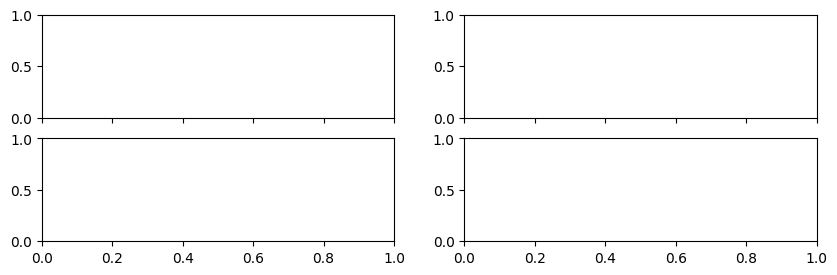

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,3), dpi=100, sharex=True, sharey=False)

x_female = df1.loc[df1.sex=='Female', df1.subabuse=='yes']
axs[0][0].hist(x_female, 10, facecolor='tab:blue', alpha=0.5, label='Female')
axs[0][0].set_title('Female')

# x_male = df1.loc[df1.sex=='Male', 'decile_score']
# axs[0][1].hist(x_male, 10, facecolor='tab:green', alpha=0.5, label='Male')
# axs[0][1].set_title('Male')

# x_afram = df1.loc[df1.race=='African-American', 'decile_score']
# axs[1][0].hist(x_afram, 10, facecolor='tab:pink', alpha=0.5, label='African-American')
# axs[1][0].set_title('African American')

# x_cauc = df1.loc[df1.race=='Caucasian', 'decile_score']
# axs[1][1].hist(x_cauc, 10, facecolor='tab:olive', alpha=0.5, label='Caucasian')
# axs[1][1].set_title('Caucasian')

plt.show()